## **DecisionTree_IBM**

#### **Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [2]:
# Read the CSV dataset using pandas

data = pd.read_csv('preprocessed_data_IBM.csv')

# Select the features and target variable

X_train = data.drop(columns=['Churn'])
y_train = data['Churn']

#### **Model Training**

In [3]:
# Split the data into two sets: Training (70%), Test (30%)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Load the ML/DL model

clf = DecisionTreeClassifier()

# Fit the training set into the model

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
# Predict the customer churn

y_train_pred = clf.predict(X_train)

In [5]:
# Calculate the accuracy of the model

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {accuracy_train * 100:.2f}%\n")

# Display the full classification report 

print(f"Classification Report:\n\n{classification_report(y_train, y_train_pred)}")

Accuracy on training set: 99.86%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      1308

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922



Confusion Matrix on training set:

 [[3613    1]
 [   6 1302]] 



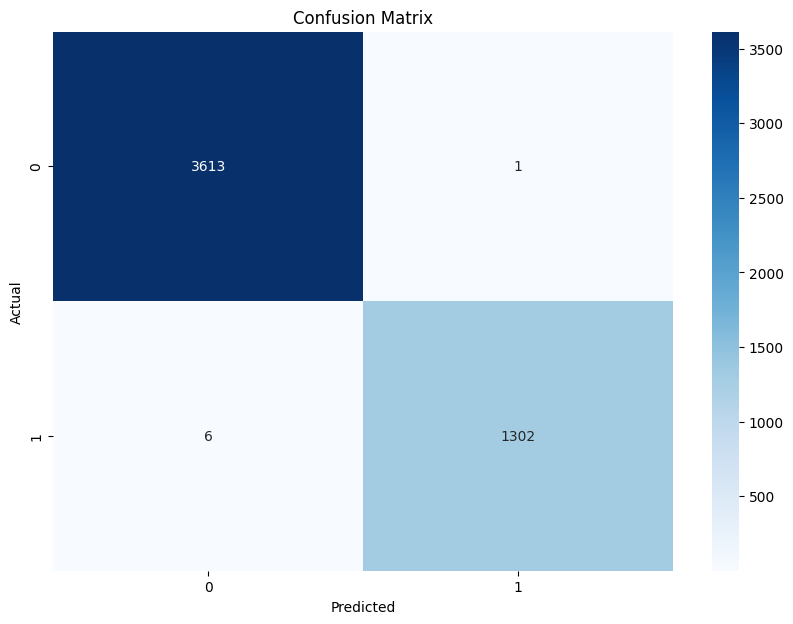

In [6]:
# Display the confusion matrix

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix on training set:\n\n", conf_matrix_train,'\n')

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Model Enhancement**

In [7]:
# Tune the parameters of the model and find the best model using Grid Search

def tuneModel(model, X_train, y_train, param_grid, scoring='accuracy', cv=5):   
    gridSearch = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring, cv=cv)
    
    gridSearch.fit(X_train, y_train)

    bestParameters = gridSearch.best_params_
    bestScore = gridSearch.best_score_

    print(f"Best parameters: {bestParameters}\n")
    print(f"Best {scoring} score: {bestScore}")
    
    bestModel = gridSearch.best_estimator_
    return bestModel

# Validate the model performance using cross validation method with num of folds = 5

def crossValidScore(model, X_train, y_train, scoring='accuracy', cv=5):
    result = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv)

    print(f"\nCross Validation Scores ({scoring}): {result}")
    print(f"\nMean Accuracy      : {result.mean() * 100:.2f}%")
    print(f"Standard Deviation : {result.std():.2f}")

In [8]:
# Prepare the parameters of the model for tuning

clf_param = {
    'max_depth': np.arange(2, 15),
    'min_samples_split': [10, 20, 30, 40, 50, 100]}

# Assign the best model into a variable

clf_tuned = tuneModel(clf, X_train, y_train, clf_param, 'accuracy', cv=5)

Best parameters: {'max_depth': 4, 'min_samples_split': 10}

Best accuracy score: 0.7891133259048326


In [9]:
# Predict the customer churn using tuned model 

y_train_pred = clf_tuned.predict(X_train)

In [10]:
# Calculate the accuracy of the model

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy on training set: {accuracy_train * 100:.2f}%\n")

# Display the full classification report 

print(f"Classification Report:\n\n{classification_report(y_train, y_train_pred)}")

Accuracy on training set: 79.62%

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3614
           1       0.66      0.48      0.55      1308

    accuracy                           0.80      4922
   macro avg       0.74      0.69      0.71      4922
weighted avg       0.78      0.80      0.78      4922



In [11]:
# Validate the model performance

crossValidScore(clf_tuned, X_train, y_train, 'accuracy', 5)


Cross Validation Scores (accuracy): [0.78375635 0.7786802  0.79471545 0.78760163 0.80081301]

Mean Accuracy      : 78.91%
Standard Deviation : 0.01


#### **Final Evaluation**

In [12]:
# Predict the customer churn for test set using tuned model

y_test_pred = clf_tuned.predict(X_test)
y_test_pred_proba = clf_tuned.predict_proba(X_test)[:, 1]

In [13]:
# Calculate the accuracy of the model

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {accuracy_test * 100:.2f}%\n")

# Display the full classification report 

print(f"Classification Report:\n\n{classification_report(y_test, y_test_pred)}")

Accuracy on test set: 78.10%

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.62      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110



Confusion Matrix on training set:

 [[1392  157]
 [ 305  256]] 



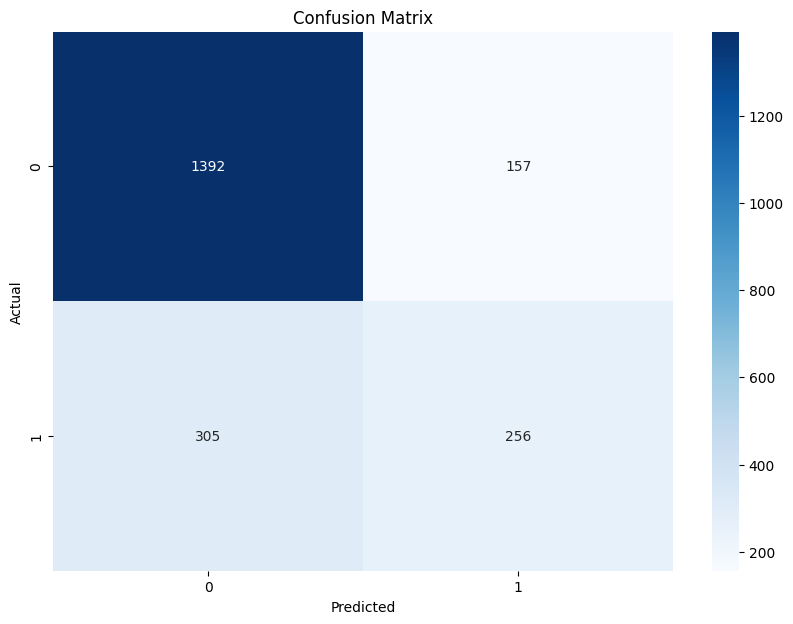

In [14]:
# Display the confusion matrix

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix on training set:\n\n", conf_matrix_test,'\n')

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

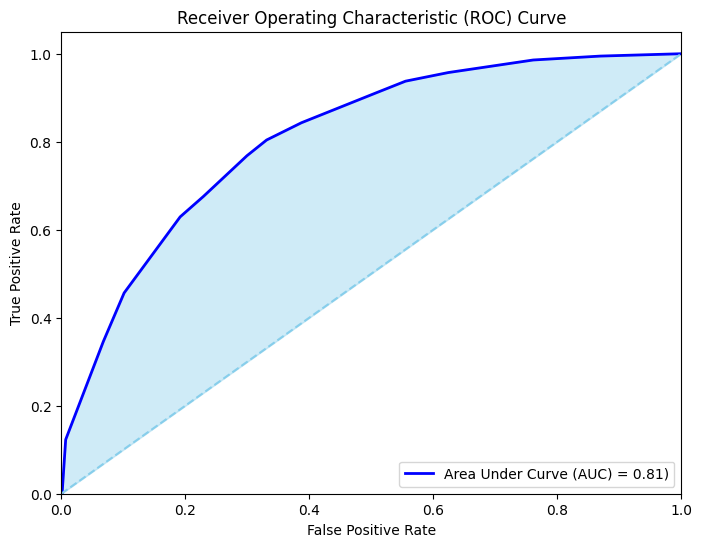

In [15]:
# Calculate the FPR, TPR, and AUC score

fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc_score = roc_auc_score(y_test, y_test_pred_proba)

# Plot the ROC Curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Area Under Curve (AUC) = {auc_score:.2f})')
plt.fill_between(fpr, tpr, fpr, color='skyblue', alpha=0.4)
plt.plot([0, 1], [0, 1], color='skyblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

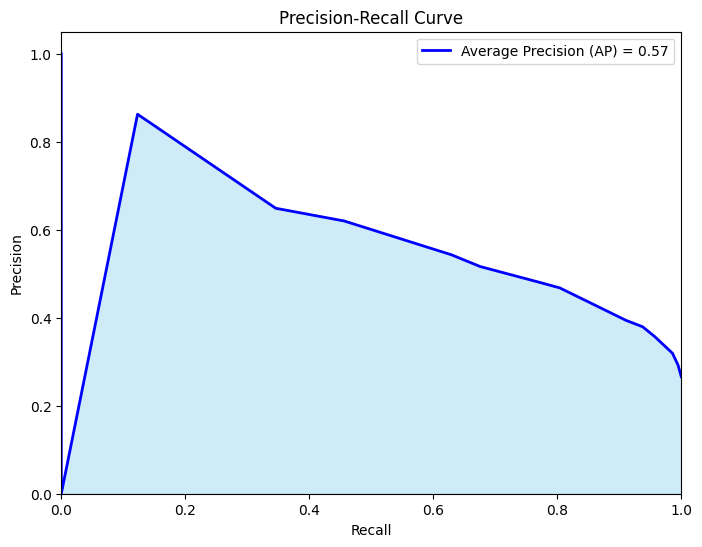

In [16]:
# Calculate the precision, recall, and average precision score

precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
avg_precision = average_precision_score(y_test, y_test_pred_proba)

# Plot the Precision-Recall Curve

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Average Precision (AP) = {avg_precision:.2f}')
plt.fill_between(recall, precision, alpha=0.4, color='skyblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()